In [46]:
import numpy as np
from scipy import ndimage as nd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load Image, Reduce Size, Convert to Gray

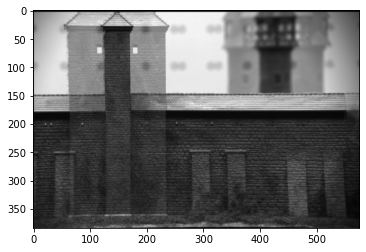

In [47]:
# Convert RGB to grayscale
def rgb2gray(image):
    image = np.array(image)
    r, c, ch = image.shape
    gray = np.zeros([r,c])

    gray = np.mean(image, axis=2)
    return gray

# Load image1
file = 'Cones_im2.jpg'
file = 'cast-left-1.jpg'
image1 = Image.open(file)
# Convert to grayscale
gray1 = rgb2gray(image1)

# Load image2
file = 'Cones_im6.jpg'
file = 'cast-right.jpg'
image2 = Image.open(file)
# Convert to grayscale
gray2 = rgb2gray(image2)

plt.imshow(image1)
plt.imshow(image2,alpha=0.5)

In [48]:
# Cones
x = 21
x = 47
#29

# Cast
#x = 63
#x = 56
#63

In [49]:
def slideScore(left,right):

    r,c = np.shape(left)
    norm_score = np.ones(c)
    for i in range(c):
        slide1 = np.hstack([np.zeros([r,i]),right])
        slide2 = np.hstack([left,np.zeros([r,i])])

        dis = abs(slide1-slide2)

        area = r*(c-i)
        norm_score[i] = np.sum(dis[:,i:c])/area

    return norm_score

Text(0, 0.5, 'Normalized Image Difference')

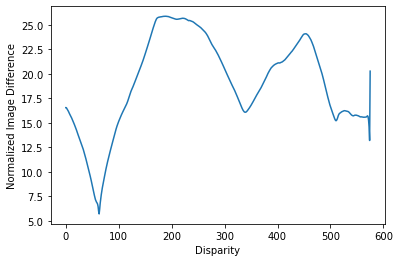

In [50]:
ns = slideScore(gray1,gray2)
plt.plot(ns/255*100)
np.where(ns==min(ns))
plt.xlabel('Disparity')
plt.ylabel('Normalized Image Difference')

(array([45]),)

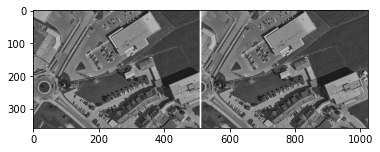

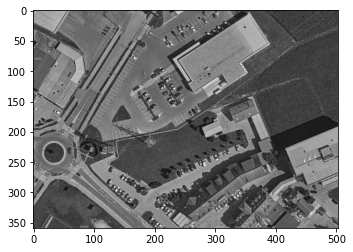

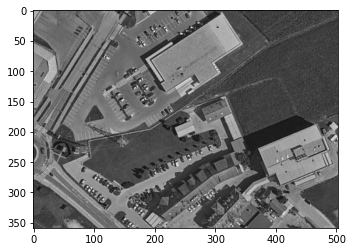

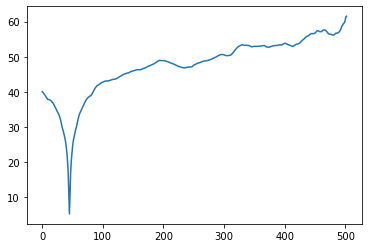

In [51]:
file = 'stereo-pair.jpg'
im = Image.open(file)
im = rgb2gray(im)

left = im[:,0:503]
right = im[:,520:-1]

plt.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.imshow(left,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.imshow(right,cmap='gray',vmin=0,vmax=255)

ns = slideScore(left,right)
plt.figure()
plt.plot(ns)
np.where(ns==min(ns))